# Real-Time ANPR using Haarcascade Classifier

## 1.Importaing Library

In [1]:
import cv2
import pandas
import numpy as np
import matplotlib as plt
import easyocr
import matplotlib.pyplot as plt
import imutils

## 2.Loading Our Classifier 

In [2]:
frameWidth = 640    #Frame Width
franeHeight = 480   # Frame Height

plateCascade = cv2.CascadeClassifier("haarcascade_russian_plate_number.xml")
minArea = 500

## 3.Using Web Cam to Detect Numberplate

In [3]:
 #define a video capture object
vid = cv2.VideoCapture(0)
vid.set(3,frameWidth)
vid.set(4,franeHeight)
vid.set(10,150)
img_counter = 0
while(True):
    success , img  = vid.read()

    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    numberPlates = plateCascade .detectMultiScale(imgGray, 1.1, 4)
   #
    for (x, y, w, h) in numberPlates:
        area = w*h
        if area > minArea:
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            #cv2.putText(img,"NumberPlate",(x,y-5),cv2.FONT_HERSHEY_COMPLEX,1,(0,0,255),2)
            imgRoi = img[y:y+h,x:x+w]
            cv2.imshow("ROI",imgRoi)
            
    ret, img = vid.read()
    
    cv2.imshow('frame', img)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        
       
        break
 
# After the loop release the cap object
vid.release()
cv2.destroyAllWindows()
imgnew = cv2.cvtColor(imgRoi, cv2.COLOR_BGR2GRAY)
cv2.imwrite("ROI.jpg",imgnew) #save image
# Destroy all the windows


True

## 4.Detected Numberplate

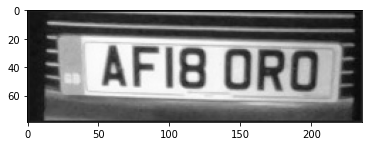

In [4]:
imgnp = cv2.imread('ROI.jpg')
plt.imshow(cv2.cvtColor(imgnp, cv2.COLOR_BGR2RGB))

## 5.Applying EasyOCR

In [5]:
reader = easyocr.Reader(['en'])
result = reader.readtext(imgnp)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[47, 19], [211, 19], [211, 63], [47, 63]], 'AFI8 ORO', 0.6243985760467669)]

## 6.Showing Result

In [6]:
numberplate=result[0][-2]
print("Number Plate detected:",result[0][-2])


Number Plate detected: AFI8 ORO


## 7.Saving Result To CSV File

In [7]:
import csv 
ID='1'
Details = ['ID', 'Numberplate']  
rows = [['1   ',numberplate]]
with open('Result.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(Details) 
    write.writerows(rows) 
print("number plate saved to the Result.csv file")  

number plate saved to the Result.csv file
